# Exercises of the seventh week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data files were stored in a "data7" folder in the present working directory

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

           label  features_1  features_2  features_3  features_4  features_5  \
0     -89.243497    2.175170   -0.285786   -0.603396   -0.627453   -0.686474   
1     230.050125    1.481941   -1.327870   -0.543583   -0.303578    1.552964   
2    -286.844411   -1.154394   -0.178649   -1.636646    0.239353   -0.684994   
3     364.552862    0.197665    1.455707    1.562205    2.168207    0.053335   
4     515.460006    0.596676    0.969860    1.294158   -0.404728    2.145297   
...          ...         ...         ...         ...         ...         ...   
1995 -328.100239   -1.820929    1.358539   -2.494838    0.828299    0.199255   
1996  -62.960036   -0.883712   -0.063687   -0.418704   -0.872601    0.363769   
1997  -90.262252   -0.021394   -0.312864   -0.730848   -1.341482   -0.720862   
1998  -74.333901   -0.041909   -0.862731   -1.232011    1.268843    0.093043   
1999    8.321454   -1.056364    0.259247    0.307835    1.094903    0.472395   

      features_6  features_7  features_

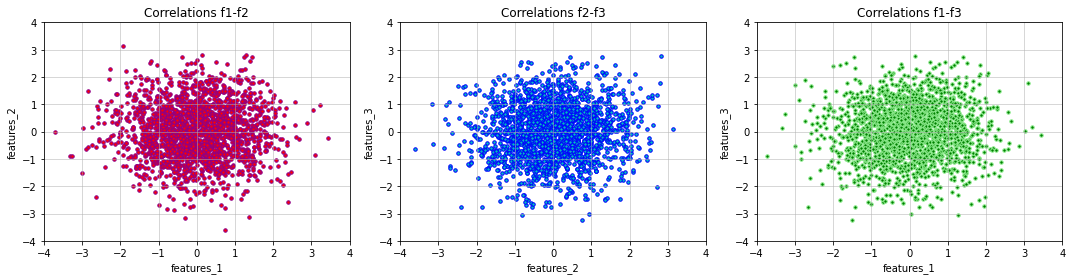

In [2]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data7/
data = pd.read_csv("data7/regression_generated.csv")
print(data, "\n")

# Load series from DataFrame
c1 = data.loc[:,"features_1"]
c2 = data.loc[:,"features_2"]
c3 = data.loc[:,"features_3"]

# Defining figure and axes, plotting scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(x=c1, y=c2, s=12, c = "r", edgecolors = "DarkMagenta")
ax2.scatter(x=c2, y=c3, s=12, c = "c", edgecolors = "b")
ax3.scatter(x=c1, y=c3, s=12, c = "g", edgecolors = "LightGreen")

# Plot adjustments
ax1.set_title("Correlations f1-f2")
ax1.set_xlabel("features_1")
ax1.set_ylabel("features_2")
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)

ax2.set_title("Correlations f2-f3")
ax2.set_xlabel("features_2")
ax2.set_ylabel("features_3")
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)

ax3.set_title("Correlations f1-f3")
ax3.set_xlabel("features_1")
ax3.set_ylabel("features_3")
ax3.set_xlim(-4, 4)
ax3.set_ylim(-4, 4)

ax1.grid(linewidth=0.5, zorder=-10)
ax2.grid(linewidth=0.5, zorder=-10)
ax3.grid(linewidth=0.5, zorder=-10)

# Correlation between the variables
print("Correlation values:")
print("- Correlation features_1/features_2:", data["features_1"].corr(data["features_2"]))
print("- Correlation features_1/features_2:", data["features_1"].corr(data["features_3"]))
print("- Correlation features_2/features_3:", data["features_2"].corr(data["features_3"]), "\n")

print("Features are not correlated.")

fig.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

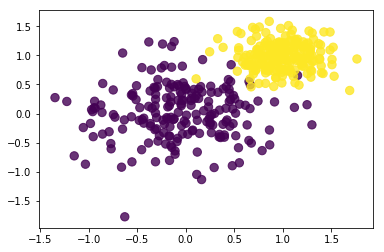

In [3]:
from IPython.display import Image
Image("../images/two_categories_scatter_plot.png")

Set 1:
 Mean: [-5 -3] 
 Standard deviation: 4
Set 2:
 Mean: [-5  0] 
 Standard deviation: 3


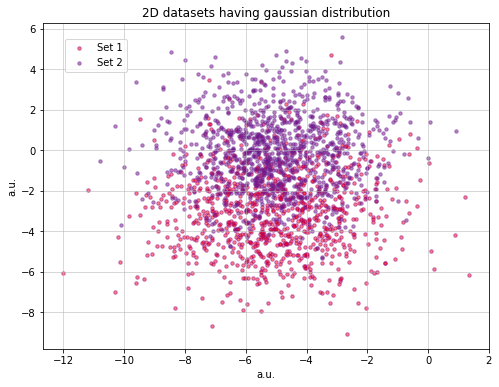

In [4]:
from matplotlib.ticker import FuncFormatter, AutoMinorLocator

# Define variables I might need later
mean1 = np.zeros(2)
mean2 = np.zeros(2)
cov1 = np.zeros((2,2)) 
cov2 = np.zeros((2,2))

# Function generating 2 sets of 2D data spread in a 2D gaussian distribution
def bigen():

    v1 = np.random.randint(-5,6,size=2)
    v2 = np.random.randint(-5,6,size=2)
    if v2.all() == v1.all():
        while(v2.all() == v1.all()):
            v2 = np.random.randint(-5,6,size=2)
    
    v3 = np.random.randint(1,5)
    v4 = np.random.randint(1,5)
    if v4 == v3:
        while(v4 == v3):
            v4 = np.random.randint(1,5)
    
    global mean1, cov1, mean2, cov2
    mean1 = v1
    cov1 = np.array([[v3,0], [0,v3]])

    mean2 = v2
    cov2 = np.array([[v4,0], [0,v4]])

    d1 = np.random.multivariate_normal(mean1, cov1, size=1000)
    d2 = np.random.multivariate_normal(mean2, cov2, size=1000)
    
    sets = np.array([d1, d2])
    
    return sets

# Function I might need for ticks format
def intonly(x, pos):
    
    if (x % 1) != 0:
        return ""
    
    return int(x)

# Run the function
datasets = bigen()

# Print datasets data
print("Set 1:\n Mean:", mean1, "\n Standard deviation:", cov1[(0,0)])
print("Set 2:\n Mean:", mean2, "\n Standard deviation:", cov2[(0,0)])

# Defining figure and axes, plotting the scatter plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(datasets[0][:,0], datasets[0][:,1], s=12, c = "r", alpha=0.5, label="Set 1",  edgecolors = "DarkMagenta")
ax.scatter(datasets[1][:,0], datasets[1][:,1], s=12, c = "Purple", alpha=0.5, label="Set 2",  edgecolors = "RebeccaPurple")

# Plot adjustments
ax.set_title("2D datasets having gaussian distribution")
ax.set_xlabel("a.u.")
ax.set_ylabel("a.u.")

# x,y axis range; commented because the plot looks better without these lines, but they work if you want the plot axis ranging from an integer to another integer
# lines removing non-integer tick labels if necessary
"""
ax.set_xlim(min(mean1[0]-2*cov1[(0,0)]-int(np.round(3/cov1[(0,0)])), mean2[0]-2*cov2[(0,0)]-int(np.round(3/cov1[(0,0)]))), max(mean1[0]+2*cov1[(0,0)]+int(np.round(3/cov1[(0,0)])), mean2[0]+2*cov2[(0,0)]+int(np.round(3/cov1[(0,0)]))))
ax.set_ylim(min(mean1[1]-2*cov1[(1,1)]-int(np.round(3/cov1[(1,1)])), mean2[1]-2*cov2[(1,1)]-int(np.round(3/cov1[(1,1)]))), max(mean1[1]+2*cov1[(1,1)]+int(np.round(3/cov1[(1,1)])), mean2[1]+2*cov2[(1,1)]+int(np.round(3/cov1[(0,0)]))))
ax.xaxis.set_major_formatter(FuncFormatter(intonly))
ax.yaxis.set_major_formatter(FuncFormatter(intonly))
"""
ax.grid(linewidth=0.5)
ax.legend(loc=(0.05,0.85))

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

X array:
[ 0.83333333  2.5         4.16666667  5.83333333  7.5         9.16666667
 10.83333333 12.5        14.16666667 15.83333333 17.5        19.16666667
 20.83333333 22.5        24.16666667]

Y array:
[-0.19121409 -0.16524649 -0.136472   -0.12858998 -0.08225938 -0.0986224
 -0.06823558 -0.09576672 -0.13752665 -0.12755093 -0.16117397 -0.08168838
  0.0445752   0.09428571  0.36047619]

Y errors array:
[0.4650168  0.40956283 0.40609345 0.42818694 0.43703932 0.41852454
 0.45196948 0.49425753 0.45733719 0.45586764 0.41596622 0.3922764
 0.46746555 0.09293403 1.18338526]



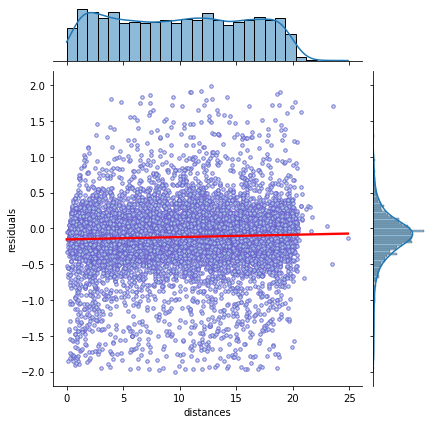

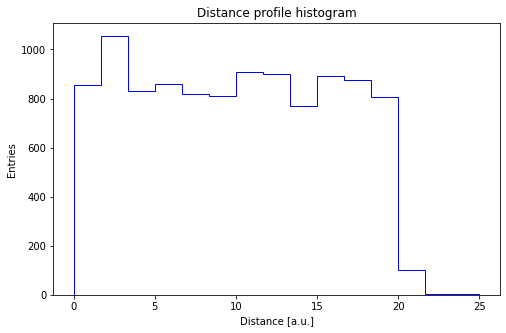

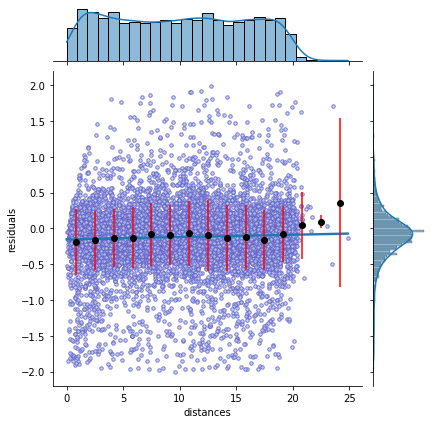

In [5]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data7/

import pickle

# Import data into a dataframe, apply the residual<2 filter
filename = "data7/residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()

df = pd.DataFrame(tdict)
df = df[abs(df.loc[:, "residuals"]) < 2]

# Seaborn jointplot
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"LightBlue", "edgecolors":"SlateBlue", "s":12}, "line_kws":{"color":"r"}})

# Figure, axes definition, plotting manually the distance histogram
fig = plt.figure(figsize=(8, 5)) # create the figure and the axes
plt.hist(df["distances"], range=(0, 25), bins=15, histtype="step", color="b")
ax = fig.axes[0]
ax.set_title("Distance profile histogram")
ax.set_xlabel("Distance [a.u.]")
ax.set_ylabel("Entries")

# Building the x, y erry arrays
# x as bin centers
aux = np.linspace(0, 25, 16)
x = np.array((aux[0:15]+aux[1:16])/2)

# y as mean, erry as std deviation of the values contained in a bin
dux = np.digitize(df["distances"], aux)
y = np.zeros(15)
erry = np.zeros(15)
for i in range(15):
    y[i] += [df["residuals"][dux == i+1].mean(),]
    erry[i] += [df["residuals"][dux == i+1].std(),]

print("X array:")
print(str(x) + "\n")
print("Y array:")
print(str(y) + "\n")
print("Y errors array:")
print(str(erry) + "\n")

# Overlap jointplot-y with errorbars
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"LightBlue", "edgecolors":"SlateBlue", "s":12}})
plt.errorbar(x=x, y=y, yerr=erry, ecolor="r", fmt="ko")

plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


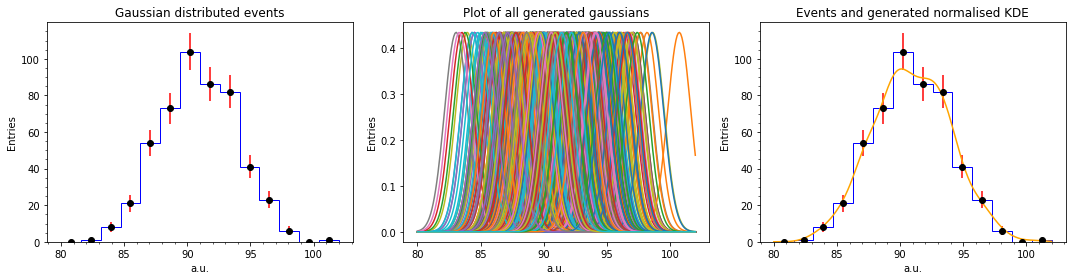

In [6]:
from scipy.stats import norm
from scipy.integrate import trapz

# Defining gaussian parameters + number of events
mu = 91
sigma = 3 
nev = 500

# Generating set of random data with gaussian distribution
x = np.random.normal(mu, sigma, nev)

# Plotting histogram of the generated data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
entries, edges, _ = ax1.hist(x, range=(80, 102), bins=14, histtype="step", color="b")
ax1.set_title("Gaussian distributed events")
ax1.set_xlabel("a.u.")
ax1.set_ylabel("Entries")

def intonly(x, pos):
    if (x % 1) != 0:
        return ""
    return int(x)

ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_major_locator(plt.MultipleLocator(20))
ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_major_formatter(FuncFormatter(intonly))

# Defining an array of bin centres as last exercise to plot dots with errorbars over the histogram
binctr = np.array((edges[1:]+edges[:-1])/2)
ax1.errorbar(binctr, entries, yerr=np.sqrt(entries), fmt="ko", ecolor="r")

# Defining a fine x axis to store the profile of the gaussians that will be generated by the single entries
xax = np.linspace(np.amin(edges), np.amax(edges), (int(np.ceil(np.amax(edges)))-int(np.floor(np.amin(edges)))+1)*10)

# Defining standard deviation as requested
stddev = 1.06*x.std()*(x.size**(-1/5))

# Generating an array to store each gaussian generated by an entry, plotting it
gauss = np.zeros((len(x),len(xax)))
for count,ev in enumerate(x):
    xgaus = norm.pdf(xax, ev, scale=stddev)
    ax2.plot(xax, xgaus)
    gauss[count,:]= xgaus

ax2.set_title("Plot of all generated gaussians")
ax2.set_xlabel("a.u.")
ax2.set_ylabel("Entries")

# Summing the gaussians and normalising
pdf = np.sum(gauss, axis=0)
norm = trapz(pdf,xax)/(nev*(int(np.ceil(np.amax(edges)))-int(np.floor(np.amin(edges))))/(len(edges)-1))
npdf = pdf/norm

# Replotting the initial histogram + the normalised generated KDE
ax3.hist(x, range=(80, 102), bins=14, histtype="step", color="b")
ax3.errorbar(binctr, entries, yerr=np.sqrt(entries), fmt="ko", ecolor="r")
ax3.plot(xax, npdf, color="Orange")

ax3.set_title("Events and generated normalised KDE")
ax3.set_xlabel("a.u.")
ax3.set_ylabel("Entries")

ax3.xaxis.set_major_locator(plt.MultipleLocator(5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.yaxis.set_major_locator(plt.MultipleLocator(20))
ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
ax3.yaxis.set_major_formatter(FuncFormatter(intonly))

fig.tight_layout()
plt.show()